In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=7
paper='2004.04168'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's break down the problem step by step.

The Hamiltonian consists of:
1. A kinetic term: $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$, where $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$
2. A Hartree term: $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
3. A Fock term: $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$

We're told that $U(k) = \sum_{n} U(n) e^{-i k \cdot n}$, with $U_0$ being the on-site interaction and $U_1$ being the nearest neighbor interaction.

The hopping parameters are:
- t_1 = 6 meV for nearest-neighbor hopping
- t_2 = 1 meV for next-nearest-neighbor hopping

The lattice is triangular.

Now, I'll answer the questions:

### QUESTION 1: Dimension and Basis Order

First, I need to identify the flavors in t

In [7]:
print(generated_code['thinking'])

Let's break down the problem step by step.

The Hamiltonian consists of:
1. A kinetic term: $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$, where $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$
2. A Hartree term: $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
3. A Fock term: $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$

We're told that $U(k) = \sum_{n} U(n) e^{-i k \cdot n}$, with $U_0$ being the on-site interaction and $U_1$ being the nearest neighbor interaction.

The hopping parameters are:
- t_1 = 6 meV for nearest-neighbor hopping
- t_2 = 1 meV for next-nearest-neighbor hopping

The lattice is triangular.

Now, I'll answer the questions:

### QUESTION 1: Dimension and Basis Order

First, I need to identify the flavors in the system. Looking at the Hamiltonian, I see the inde

In [8]:
print(generated_code['text'])

1) Number of Flavors, D = (2,)
Basis Order:
0: spin_up
1: spin_down

2) EXP-VAL DEPENDENT TERMS: {
   "$\langle c_s^\dagger(k_1) c_s(k_1) \rangle$": "Mean of `exp_val[s, s, :]`",
   "$\langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle$": "`exp_val[s, s', k1]`"
}

TERMS:
- $E_s(k) c^\dagger_s(k) c_s(k)$ -> H[s, s, k], NI (Non-interacting kinetic term)
- $\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$ -> H[s', s', k2], I (Hartree term)
- $-\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$ -> H[s', s, k2], I (Fock term)

3) CODE:
```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a system with two spin states on a triangular lattice.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary co

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a system with two spin states on a triangular lattice.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor of the system. Default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={'t1': 6.0, 't2': 1.0, 'U0': 1.0, 'U1': 0.5}, filling_factor: float=0.5):
        self.lattice = 'triangular'  # Lattice symmetry
        self.D = (2,)  # Number of flavors (spin up, spin down)
        self.basis_order = {'0': 'spin'}
        # Order for each flavor:
        # 0: spin up
        # 1: spin down
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0.0)  # temperature, default to 0
        self.a = parameters.get('a', 1.0)  # Lat

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2004_04168_7.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

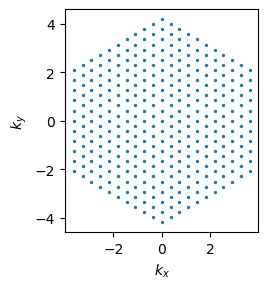

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

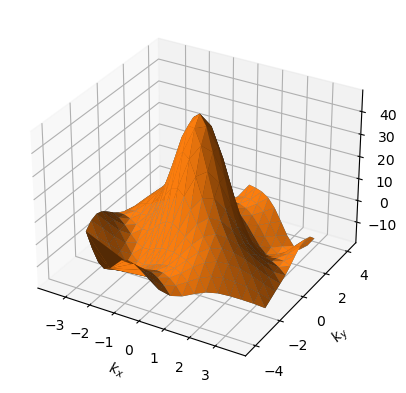

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

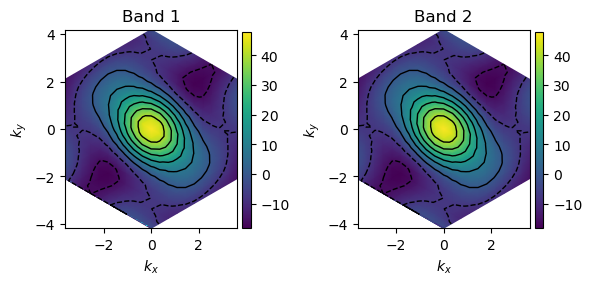

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, parameters={'U_0': 1e-5},filling_factor=0.5)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,0.5,0)

In [25]:
wf_int, en_int, exp_val= HF.solve(ham_int,1e-10*exp_val,100)

Convergence reached at iteration 2


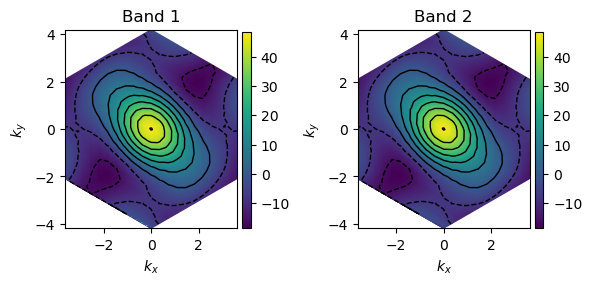

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, parameters={'U_0': 1e5},filling_factor=0.5)

In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 3


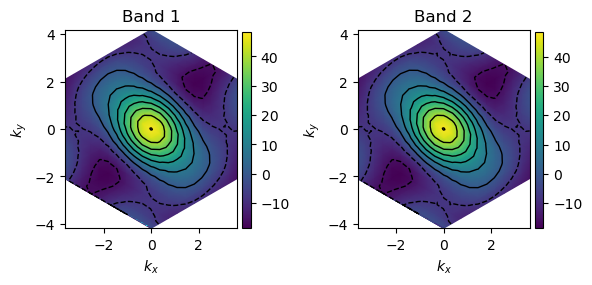

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int)

Gap is -67.06
U/T is 0.09
mean_U is 0.50


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image and check if it correctly represents the momentum space mesh in the first Brillouin zone for the given problem.

The image shows a hexagonal arrangement of points in k-space, with k_x on the horizontal axis and k_y on the vertical axis. Both axes range approximately from -4 to 4.

Let's check the rubric points:

1. **Check if the image shows momentum space mesh in the first Brillouin zone of the concerned problem.**

The problem states that the lattice is triangular. For a triangular lattice, the first Brillouin zone is hexagonal in shape. The image does show a hexagonal arrangement of points, which is consistent with the Brillouin zone of a triangular lattice.

2. **Check the point group symmetry.**

A triangular lattice has C6 (6-fold rotational) symmetry. Looking at the hexagonal arrangement of points in the image, it appears to have the correct symmetry. The hexagon is centered at the origin (0,0) and ext

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

I need to analyze the band structure plots shown in the image according to the rubric. The image shows two band structure plots labeled "Band 1" and "Band 2" for what appears to be a triangular lattice system. Let me analyze them systematically according to the rubric requirements:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see that the Brillouin zone is shown as a hexagon in both plots. This is correct for a triangular lattice, as the first Brillouin zone of a triangular lattice is indeed hexagonal. So this aspect is correct.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
In both Band 1 and Band 2, the highest energy region (yellow) appears to be concentrated near the center of the Brillouin zone, with the peak slightly offset from

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0, nu=1/2)
    )


#################### THINKING ####################

I'm given an image showing two plots labeled "Band 1" and "Band 2", which appear to be false color plots of band structures in the first Brillouin zone after a self-consistent Hartree-Fock calculation. Let me analyze this using the rubric provided:

1. First, I need to identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see that the Brillouin zone has a hexagonal shape, which is indeed the correct Brillouin zone for a triangular lattice. This is correct.

2. Next, I need to examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identifying the highest energy regions (yellow):
The highest energy regions (yellow) are centered approximately at (kx, ky) = (0, 0) in both Band 1 and Band 2.

2.2 Tracing the pattern of energy variation across the zone:
The energy distribution appears to form elliptical contours around the

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,nu=1/2,U_int=1e5)
    )


#################### THINKING ####################

Let me analyze the image according to the rubric for a Hartree-Fock calculation of a triangular lattice system. I need to evaluate whether this image correctly shows the band structure after self-consistent Hartree-Fock calculation.

First, let me look at what's shown in the image:
- The image shows two plots labeled "Band 1" and "Band 2"
- Each plot shows a hexagonal Brillouin zone
- The plots are false-color contour plots with energy shown in a color scale ranging from purple (low energy) to yellow (high energy)
- The axes are labeled kx and ky, representing momentum space coordinates
- The contours appear to show elliptical energy distributions with the highest energy at the center

Now, let me go through the rubric points one by one:

1. **Shape of the Brillouin zone boundary**:
   The Brillouin zone is shown as a hexagon in both plots, which is indeed the correct shape for a triangular lattice. This is correct.

2. **Symmetry of

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '7' saved to final_answer.yaml
